<br />

# Exploring the Rosetta Stone of Human Capital

## Business Analytics Practicum I

## 2nd Assignment


---

> Anastasios Theodorou, Student <br />
> Master of Science in Business Analytics <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> AM: p2822007


### Q1: Income and Test Results

Investigate the relationship between logged income and TIMMS, and logged income and PIRLS. Give the summary table of your model. Plot the two relationships, creating plots like the ones shown in Section 4.1/Figure 5 f the original paper.

In [1]:
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import numpy as np
from plotnine import *
import seaborn as sns
import scipy.stats.stats as stats

%matplotlib inline

* We insert the data we want and assign them to dataframes. The "country_scores" dataframe has been taken from the internet and the others have been saved and taken locally, from our hard disk.

In [2]:
country_scores = pd.read_excel('https://www.cgdev.org/sites/default/files/patel-sandefur-human-capital-final-results.xlsx', sheet_name='Country Scores')
print(country_scores.shape)
country_scores.head()

(78, 6)


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542
2,Armenia,ARM,71.505402,NaN,454.000000,NaN
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000


In [3]:
census = pd.read_csv('usa_00001.csv')
baci = pd.read_csv('BACI_HS17_Y2018_V202001.csv')
country_codes = pd.read_csv('country_codes_V202001.csv')
income_country = pd.read_csv('WDI_data.csv')

In [4]:
income = income_country[['Country Code','2015 [YR2015]']]
income = income.rename(columns={'2015 [YR2015]': 'Income'})
income = income[income['Income'].notna()]
income.head()

,Country Code,Income
0,AFG,1809.01648820483
1,AFG,..
2,AFG,107.225357055664
3,ALB,10971.2925173789
4,ALB,95.1996002197266


In [5]:
#deactivate a minor warning that pandas library shows concerning the copy of dataframes
pd.options.mode.chained_assignment = None  # default='warn'
income['Income'] = income['Income'].str.replace('^\..$', '', regex=True)
income['Income'] = income['Income'].str.strip()
income = income[income['Income'] != '']
income['Income'] = income.loc[:,['Income']].astype('float64').copy()
income.head()

,Country Code,Income
0,AFG,1809.016488
2,AFG,107.225357
3,ALB,10971.292517
4,ALB,95.199600
5,ALB,109.762444


In [6]:
income = income.groupby(['Country Code'])['Income'].sum().to_frame()
income.head()

,Income
Country Code,
AFG,1916.241845
AGO,6231.067992
ALB,11176.254561
ARB,15484.055403
ARE,66182.311483


* Create a dataframe that contains the join between the "country_scores" and the "income".

In [7]:
df = pd.merge(country_scores, income, 
               on='Country Code',
               how='inner')
print(df.shape)
df.head()

(78, 7)


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",Income
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,66182.311483
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19310.617247
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8383.182276
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43918.717917
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44455.676316


* The next dataframe is the one, which we are going to use to create the wanted plots.

In [8]:
median_timss = df.iloc[:, [4,6]]
median_timss.iloc[:, 1] = np.log(median_timss.iloc[:, 1]).copy()
median_timss = median_timss[median_timss.iloc[:, 0].notna()].copy()
median_timss = median_timss.rename(columns={'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMSS'})
median_timss.head()

,TIMSS,Income
0,437.000000,11.100169
1,406.652557,9.868410
2,454.000000,9.033983
3,520.000000,10.690096
4,511.000000,10.702248


In [9]:
mod = smf.ols("Income ~ TIMSS", data=median_timss)
df_res = mod.fit()
df_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           3.46e-08
Time:                        16:55:40   Log-Likelihood:                -92.245
No. Observations:                  71   AIC:                             188.5
Df Residuals:                      69   BIC:                             193.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.9743      0.614      9.726      0.000       4.749       7.200
TIMSS          0.0083      0.001      6.211      0.000       0.006       0.011
==============================================================================
Omnibus:                       11.526   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               18.426
Skew:                          -0.566   Prob(JB):                     9.97e-05
Kurtosis:                       5.224   Cond. No.                     2.64e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.64e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* As we can see from the above table the relationship between `log_income` ($y$) and `median_TIMSS` ($x$) is:

$$ y = 5.9743 + 0.0083 x $$

This is pretty bad model because the $R^2$ is 0.359, something that means that is only 36% better than the null/full model. The 36% $R^2$ also represents the proportion of the `median_TIMSS` variance that is explained by the `log_income`. <br />
Finally, it is worth to mention that the p-value for both the Intercept and the interaction term is equal to 0, which means that they are statistical significant and they are not taken due to chance.

In [10]:
median_timss = median_timss.rename(columns={'Income': 'Log GDP per Capita (PPP) in 2015'})
median_timss.head()

,TIMSS,Log GDP per Capita (PPP) in 2015
0,437.000000,11.100169
1,406.652557,9.868410
2,454.000000,9.033983
3,520.000000,10.690096
4,511.000000,10.702248


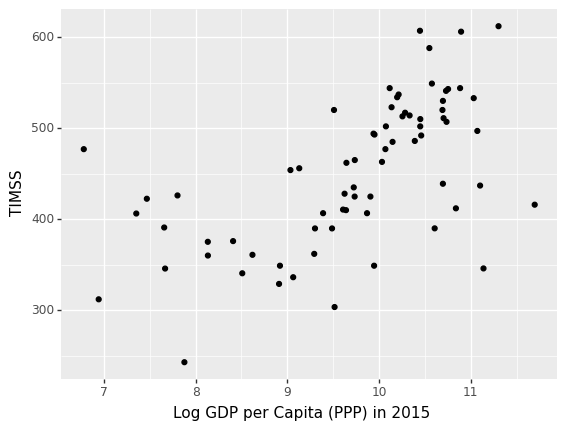

<ggplot: (108137997264)>

In [11]:
ggplot() + geom_point(aes(x=median_timss.iloc[:, 1], y=median_timss.iloc[:, 0]))

* This plot shows us in the x-axis, the medians of the Trends in International Mathematics and Science (TIMSS) scales for all the countries and in the y-axis the GDP per capita (calculated in logarithmic scale for the year 2015), adjusted for purchasing power parity in 2011 U.S. dollars. This plot presents countries from all over the world, that are either rich or poor, So, all the measures have been scaled in order to be easily compared. We can observe from the plot that the relationship between TIMSS and income does not change a lot as the sample is expanded neither we can assume a pattern as the income increases.

* We now create another dataframe for the second plot.

In [12]:
median_pirls = df.iloc[:, [5,6]]
median_pirls.iloc[:, 1] = np.log(median_pirls.iloc[:, 1]).copy()
median_pirls = median_pirls[median_pirls.iloc[:, 0].notna()].copy()
median_pirls = median_pirls.rename(columns={'Median Reading Score (PIRLS Scale, 4th Grade)': 'PIRLS'})
median_pirls.head()

,PIRLS,Income
0,440.000000,11.100169
1,431.443542,9.868410
3,534.000000,10.690096
4,533.000000,10.702248
5,467.000000,9.735046


In [13]:
mod = smf.ols("Income ~ PIRLS", data=median_pirls)
df_res = mod.fit()
df_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Income   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     56.33
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.03e-10
Time:                        16:55:44   Log-Likelihood:                -82.373
No. Observations:                  68   AIC:                             168.7
Df Residuals:                      66   BIC:                             173.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.9631      0.648      7.661      0.000       3.670       6.257
PIRLS          0.0102      0.001      7.505      0.000       0.007       0.013
==============================================================================
Omnibus:                        4.552   Durbin-Watson:                   1.613
Prob(Omnibus):                  0.103   Jarque-Bera (JB):                4.401
Skew:                           0.303   Prob(JB):                        0.111
Kurtosis:                       4.089   Cond. No.                     3.09e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* As we can see from the above table the relationship between `log_income` ($y$) and `median_PIRLS` ($x$) is:

$$ y = 4.9631 + 0.0102 x $$

This is a fair model because the $R^2$ is 0.460, something that means that is 46% better than the null/full model. As we mentioned above and here the 46% $R^2$ represents the proportion of the `median_PIRLS` variance that is explained by the `log_income`. <br />
Finally, the same stands for the p-values, that are equal to 0 and so they are statistical significant.

In [14]:
median_pirls = median_pirls.rename(columns={'Income': 'Log GDP per Capita (PPP) in 2015'})
median_pirls.head(5)

,PIRLS,Log GDP per Capita (PPP) in 2015
0,440.000000,11.100169
1,431.443542,9.868410
3,534.000000,10.690096
4,533.000000,10.702248
5,467.000000,9.735046


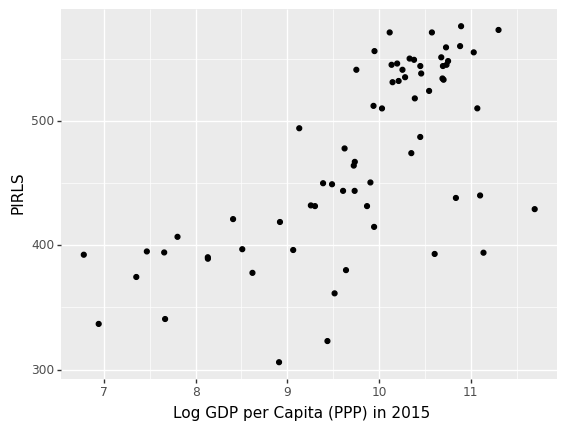

<ggplot: (108046150717)>

In [15]:
ggplot() + geom_point(aes(x=median_pirls.iloc[:, 1], y=median_pirls.iloc[:, 0]))

* This plot presents in the x-axis the Progress in International Reading Literacy Study (PIRLS) and in the y-axis the GDP per capita (calculated in logarithmic scale for the year 2015), adjusted for purchasing power parity in 2011 U.S. dollars. This plot as the above, shows countries from all over the world and again all the measures have been scaled in order to be easily compared. In the contrary from the 1st plot, here, we can observe that there is some kind relationship between PIRLS and income, because as the latter increases, somehow the first parameter increases too. This is not something that happens every time, because we can see that the lowest PIRLS exists in a country with medium per capita income. So, we cannot exclude a general conclusion and more investigation is needed.

### Q2: Years of Schooling and Test Scores

You will explore how much years of schooling impact test scores, taking account of the per capita income, as in Section 4.1 and Figure 6 of the original paper. To do that, you will need to take the residuals of the models you created in Q1; the residuals contain what cannot be explained by income, so we can use them to see how much of what cannot be explained by income can be explained by years of schooling.

* Obtain the data from the <code>BL2013_MF1599_v2.2.dta</code> file.

In [16]:
years = pd.read_stata('BL2013_MF1599_v2.2.dta')
print(years.shape)
years.head()

(1898, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,WBcode,region_code
0,1.0,Algeria,1950.0,MF,15.0,999.0,80.684593,17.563400,3.745905,1.454129,0.459588,0.297876,0.164790,0.846457,0.744399,0.092804,0.009253,5241.0,DZA,Middle East and North Africa
1,1.0,Algeria,1955.0,MF,15.0,999.0,81.050957,17.018442,3.464397,1.639253,0.495228,0.259414,0.141776,0.835015,0.728405,0.098586,0.008024,5699.0,DZA,Middle East and North Africa
2,1.0,Algeria,1960.0,MF,15.0,999.0,82.611153,14.313748,3.069391,2.752519,1.049408,0.322578,0.173414,0.880083,0.706000,0.164163,0.009920,6073.0,DZA,Middle East and North Africa
3,1.0,Algeria,1965.0,MF,15.0,999.0,80.931877,14.420929,4.006678,4.209821,1.791863,0.426420,0.226569,1.096061,0.831003,0.251998,0.013060,6374.0,DZA,Middle East and North Africa
4,1.0,Algeria,1970.0,MF,15.0,999.0,73.636833,19.217760,5.225636,6.686831,3.256895,0.344648,0.179372,1.554976,1.155191,0.389305,0.010480,7100.0,DZA,Middle East and North Africa


* Edit the dataframe in order to merge it with the one that was created in the 1st Question. 

In [17]:
years['year'] = years['year'].astype('int64')
years = years[years['year'] == 2010]
years = years.rename(columns={'WBcode' : 'Country Code'})
print(years.shape)
years.head()

(146, 20)


,BLcode,country,year,sex,agefrom,ageto,lu,lp,lpc,ls,lsc,lh,lhc,yr_sch,yr_sch_pri,yr_sch_sec,yr_sch_ter,pop,Country Code,region_code
12,1.0,Algeria,2010,MF,15.0,999.0,21.124104,43.897926,25.876770,23.205688,17.081598,11.772276,6.663670,6.678049,4.191919,2.117411,0.368719,25853.0,DZA,Middle East and North Africa
25,3.0,Benin,2010,MF,15.0,999.0,53.908321,18.656332,12.183230,23.672802,17.771658,3.762543,2.008301,4.430164,2.571308,1.743440,0.115417,5579.0,BEN,Sub-Saharan Africa
38,4.0,Botswana,2010,MF,15.0,999.0,9.826900,6.240109,4.759118,80.042625,29.029333,3.890366,2.022110,9.554915,6.260282,3.176384,0.118250,1107.0,BWA,Sub-Saharan Africa
51,6.0,Burundi,2010,MF,15.0,999.0,50.430645,39.345234,25.978859,9.183236,4.968499,1.040882,0.544171,3.346481,2.781254,0.533526,0.031701,5068.0,BDI,Sub-Saharan Africa
64,7.0,Cameroon,2010,MF,15.0,999.0,20.732958,47.911888,31.252216,28.285789,15.275344,3.069362,1.635491,6.154877,4.256232,1.804547,0.094097,10766.0,CMR,Sub-Saharan Africa


In [18]:
dfnew = pd.merge(df, years[['Country Code', 'yr_sch']], 
               on='Country Code',
               how='left')
print(dfnew.shape)
dfnew.head()

(78, 8)


,Country,Country Code,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)",Income,yr_sch
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,66182.311483,9.066772
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19310.617247,9.510379
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8383.182276,10.726531
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43918.717917,11.541207
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44455.676316,9.603404


* Rename the columns for easier processing later on.

In [19]:
dfnew.columns = ['country', 'country_code', '400_on_TIMSS', '400_on_PIRLS',
                 'median_TIMSS', 'median_PIRLS', 'income', 'years_schooling']
dfnew.head()

,country,country_code,400_on_TIMSS,400_on_PIRLS,median_TIMSS,median_PIRLS,income,years_schooling
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,66182.311483,9.066772
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19310.617247,9.510379
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8383.182276,10.726531
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43918.717917,11.541207
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44455.676316,9.603404


In [20]:
model = dfnew[['median_TIMSS', 'median_PIRLS', 'income', 'years_schooling']]
model['income'] = np.log(model['income'])
model = model.rename(columns={'income' : 'log_income'})
model.head()

,median_TIMSS,median_PIRLS,log_income,years_schooling
0,437.000000,440.000000,11.100169,9.066772
1,406.652557,431.443542,9.868410,9.510379
2,454.000000,NaN,9.033983,10.726531
3,520.000000,534.000000,10.690096,11.541207
4,511.000000,533.000000,10.702248,9.603404


In [21]:
model.sort_values(by='log_income', inplace=True)
model.reset_index(drop=True, inplace=True)
print(model.shape)
model.head(5)

(78, 4)


,median_TIMSS,median_PIRLS,log_income,years_schooling
0,476.978455,392.374207,6.782865,3.346481
1,312.077209,336.778412,6.945257,1.876762
2,406.300598,374.490417,7.354794,5.491315
3,422.527435,395.008057,7.469706,NaN
4,390.949188,394.196686,7.658999,4.430164


* Create a regression model having as independent variable the years of schooling and as a dependent variable the logarithm of the per capita income. Then, we take the summary of it.

In [22]:
mod = smf.ols("years_schooling ~ log_income", data=model)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        years_schooling   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.606
Method:                 Least Squares   F-statistic:                     110.3
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           4.96e-16
Time:                        16:55:45   Log-Likelihood:                -138.94
No. Observations:                  72   AIC:                             281.9
Df Residuals:                      70   BIC:                             286.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -10.5808      1.882     -5.621      0.000     -14.335      -6.826
log_income     2.0019      0.191     10.505      0.000       1.622       2.382
==============================================================================
Omnibus:                        8.842   Durbin-Watson:                   1.663
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                8.396
Skew:                          -0.739   Prob(JB):                       0.0150
Kurtosis:                       3.784   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As we can see from the above table the relationship between `years_schooling` ($y$) and `log_income` ($x$) is:

$$ y = -10.5808 + 2.0019 x $$

This is pretty good model because the $R^2$ is 0.612, something that means that is nearly 61% better than the null model, the one that contains all the variables of the dataset `model`. Also, the 61% $R^2$ represents the proportion of the `log_income` variance that is explained by the `years_schooling`.

In [23]:
#the residuals of the above model
model['y_pred'] = res.resid
model.head()

,median_TIMSS,median_PIRLS,log_income,years_schooling,y_pred
0,476.978455,392.374207,6.782865,3.346481,0.348569
1,312.077209,336.778412,6.945257,1.876762,-1.446246
2,406.300598,374.490417,7.354794,5.491315,1.348449
3,422.527435,395.008057,7.469706,NaN,NaN
4,390.949188,394.196686,7.658999,4.430164,-0.321695


* Now, we create another linear model that includes the median of the TIMSS score and the logarithm of the per capita income, because we want to residualize the first on the latter.

In [24]:
mod2 = smf.ols("median_TIMSS ~ log_income", data=model)
res2 = mod2.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_TIMSS   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.349
Method:                 Least Squares   F-statistic:                     38.58
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           3.46e-08
Time:                        16:55:46   Log-Likelihood:                -395.87
No. Observations:                  71   AIC:                             795.7
Df Residuals:                      69   BIC:                             800.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     32.1220     67.968      0.473      0.638    -103.471     167.715
log_income    43.1043      6.939      6.211      0.000      29.260      56.948
==============================================================================
Omnibus:                        1.360   Durbin-Watson:                   1.918
Prob(Omnibus):                  0.507   Jarque-Bera (JB):                1.179
Skew:                          -0.313   Prob(JB):                        0.555
Kurtosis:                       2.916   Cond. No.                         87.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As we can see from the above table the relationship between `median_TIMSS` ($y$) and `log_income` ($x$) is:

$$ y = 32.1220 + 43.1043 x $$

This is not a good model because the $R^2$ is 0.359, something that means that nearly 36% of the proportion of the `log_income` variance is explained by the `median_TIMSS`. Also, it is really alarming the fact that the p-value of the intercept (the constant value) is not statistical significance, because it is above 5%. This means that this constant variable is very likely to have been taken by chance.

In [25]:
model['t_pred'] = res2.resid
model.head()

,median_TIMSS,median_PIRLS,log_income,years_schooling,y_pred,t_pred
0,476.978455,392.374207,6.782865,3.346481,0.348569,152.485894
1,312.077209,336.778412,6.945257,1.876762,-1.446246,-19.415161
2,406.300598,374.490417,7.354794,5.491315,1.348449,57.155411
3,422.527435,395.008057,7.469706,NaN,NaN,68.429065
4,390.949188,394.196686,7.658999,4.430164,-0.321695,28.691453


* Create a dataframe for the wanted plot.

In [26]:
model_p = model.iloc[:, [4,5]]
model_p.dropna(inplace=True)
model_p.columns = ['Years of Schooling (Residualized)', 'TIMMS score (residualized)']
model_p.head()

,Years of Schooling (Residualized),TIMMS score (residualized)
0,0.348569,152.485894
1,-1.446246,-19.415161
2,1.348449,57.155411
4,-0.321695,28.691453
6,-2.306631,57.650781


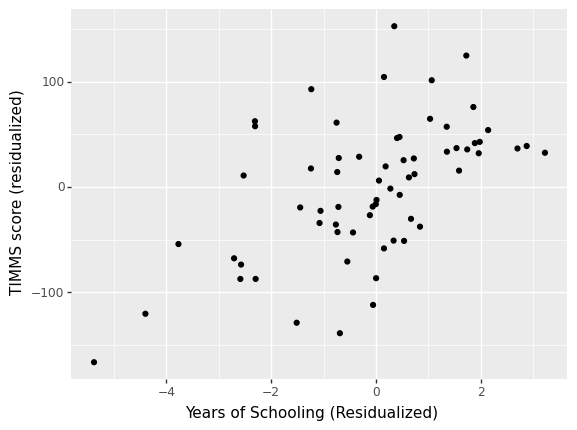

<ggplot: (108046163197)>

In [27]:
ggplot(data=model_p) +\
    geom_point(mapping=aes(x=model_p.iloc[:,0], y=model_p.iloc[:,1]))

<b> Conclusions </b>
> In the above plot we can see the residuals of both the `years_schooling` and the `median_TIMSS`. Each residual represents the difference between the predicted and the actual values. It shows us what the model cannot catch. So, in this plot we can see  the relationship between the median math test scores in 4th grade (TIMSS) and the average years of schooling for those older than 25 for each country in 2010. These values are residualized on the log income per capita. So, this residualization is like we subtracted the influence of the income upon these depicted variables. That is why, it is more clear and it would be expected that the smaller the TIMSS score is, the smaller the Years of Schooling are. Though, this relationship is not very strict, because we can see that the points do not follow a certain pattern or even distribution.
>
>Also, the negative values of these variables mean higher predicted values and the opposite stands for the positive values. In other words, with very negative TIMSS score we can be quite certain that the Years of Schooling would be few as well. 

In [28]:
#model referring to PIRLS
mod3 = smf.ols("median_PIRLS ~ log_income", data=model)
res3 = mod3.fit()
res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           median_PIRLS   R-squared:                       0.460
Model:                            OLS   Adj. R-squared:                  0.452
Method:                 Least Squares   F-statistic:                     56.33
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           2.03e-10
Time:                        16:55:46   Log-Likelihood:                -367.77
No. Observations:                  68   AIC:                             739.5
Df Residuals:                      66   BIC:                             744.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     30.0262     59.088      0.508      0.613     -87.948     148.000
log_income    45.1171      6.011      7.505      0.000      33.115      57.119
==============================================================================
Omnibus:                       10.374   Durbin-Watson:                   1.722
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               10.776
Skew:                          -0.966   Prob(JB):                      0.00457
Kurtosis:                       3.273   Cond. No.                         88.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

* As we can see from the above table the relationship between `median_PIRLS` ($y$) and `log_income` ($x$) is:

$$ y = 30.0262 + 45.1171 x $$

As the previous model and this onei s not a good model because the $R^2$ is 0.460, something that means that nearly 46% of the proportion of the `log_income` variance is explained by the `median_PIRLS`. Again, we have not statistical significance intercept (p-value = 0.613).

In [29]:
model['p_pred'] = res3.resid
model.head()

,median_TIMSS,median_PIRLS,log_income,years_schooling,y_pred,t_pred,p_pred
0,476.978455,392.374207,6.782865,3.346481,0.348569,152.485894,56.324789
1,312.077209,336.778412,6.945257,1.876762,-1.446246,-19.415161,-6.597682
2,406.300598,374.490417,7.354794,5.491315,1.348449,57.155411,12.637186
3,422.527435,395.008057,7.469706,NaN,NaN,68.429065,27.970346
4,390.949188,394.196686,7.658999,4.430164,-0.321695,28.691453,18.618599


* Create a dataframe in order to have the outcome we want.

In [30]:
model_p = model.iloc[:, [4,6]]
model_p.dropna(inplace=True)
model_p.columns = ['Years of Schooling (Residualized)', 'PIRLS score (residualized)']
model_p.head()

,Years of Schooling (Residualized),PIRLS score (residualized)
0,0.348569,56.324789
1,-1.446246,-6.597682
2,1.348449,12.637186
4,-0.321695,18.618599
6,-2.306631,24.650523


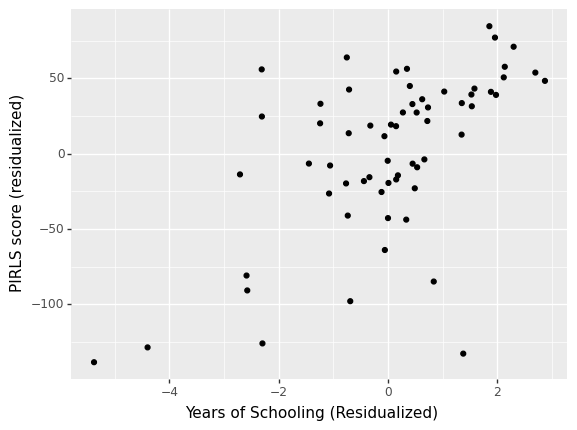

<ggplot: (108046168592)>

In [31]:
ggplot(data=model_p) +\
    geom_point(mapping=aes(x=model_p.iloc[:,0], y=model_p.iloc[:,1]))

<b> Conclusions </b>
> In the above plot we can see the residuals of both the `years_schooling` and the `median_PIRLS`. It is the same plot as the previous one with the only difference of changing the y-axis. Here, we have the median test reading scores in 4th grade (PIRLS) against the average years of schooling for those older than 25 for each country in 2010, again, residualized on the logarithm of income per capita. As it was expected to see the observations (countries) with higher predicted score, have more years of schooling. Here, like the previous plot we can detect somehow the points (countries) to move the same way as the years of schooling increases. The only difference we can observe, is the one that in PIRLS axis the maximum residualized values do not overcome the 100. This means that in TIMMS, a score concerning the maths and not so much the reading of the students, the score can be higher and maybe the students do not like or maybe they do not have the opportunity to read a lot of time in order to increase the PIRLS score.

### Q3: Compare New and Previous Estimates

To see if the results of the authors make sense, we can compare their scales with other estimates of learning outcomes, as in Section 4.1 and Figure 7 of the original paper.

Run a Spearman test to compare the new and the previous estimates for TIMSS and PIRLS. Use the latest year for which estimates are available for each country. Report your findings. Then, create two plots like the following.

* We created the dataframe `learn` which will be used later on and contains the data from the `HLO Panel Data (mean, thresh) - Jan 2018.dta` file.

In [32]:
learn =  pd.read_stata('HLO Panel Data (mean, thresh) - Jan 2018.dta')
learn = learn[learn['low_threshold'].notna()]
learn['year'] = learn['year'].astype('int64')

print(learn.shape)
learn.sort_values(by='year', ascending=False)

(626, 6)


,country,idcntry,cntabb,year,HLO,low_threshold
1273,Northern Ireland,928,NIR,2015,564.280029,95.070000
372,Chinese Taipei,158,TWN,2015,597.750000,97.330002
1538,Slovakia,703,SVK,2015,495.320007,85.870003
647,Georgia,268,GEO,2015,459.679993,80.500000
999,Macedonia F.Y.R.,807,MKD,2015,389.000000,58.020000
...,...,...,...,...,...,...
342,Chile,152,CHL,1970,340.609985,40.790001
605,France,250,FRA,1970,438.910004,88.610001
814,Japan,392,JPN,1970,547.770020,91.629997
133,Belgium Flemish,5602,BFL,1970,486.320007,92.389999


* Because each country had various records referring to different years, we used only the most recent one. 

In [33]:
learn = learn.loc[learn.groupby('cntabb')['year'].idxmax()]
learn = learn.rename(columns={'cntabb' : 'country_code'})
print(learn.shape)

learn.sort_values(by='year', ascending=False).head()

(158, 6)


,country,idcntry,country_code,year,HLO,low_threshold
10,"Abu Dhabi, UAE",7842,ADA,2015,437.070007,73.750000
681,Greece,300,GRC,2015,477.869995,81.099998
999,Macedonia F.Y.R.,807,MKD,2015,389.000000,58.020000
1098,Mexico,484,MEX,2015,443.359985,71.209999
1716,Turkey,792,TUR,2015,470.390015,79.449997


* We joined the above dataframe to the main one.

In [34]:
dfnew = pd.merge(dfnew, learn[['country_code', 'low_threshold']], 
               on='country_code',
               how='left')
print(dfnew.shape)
dfnew.head()

(78, 9)


,country,country_code,400_on_TIMSS,400_on_PIRLS,median_TIMSS,median_PIRLS,income,years_schooling,low_threshold
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,66182.311483,9.066772,80.839996
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19310.617247,9.510379,70.860001
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8383.182276,10.726531,86.129997
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43918.717917,11.541207,91.529999
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44455.676316,9.603404,88.510002


In [35]:
dfnew['400_on_TIMSS'] = dfnew['400_on_TIMSS'].astype('float64')
dfnew['400_on_PIRLS'] = dfnew['400_on_PIRLS'].astype('float64')
dfnew['low_threshold'] = dfnew['low_threshold'].astype('float64')
dfnew.head()

,country,country_code,400_on_TIMSS,400_on_PIRLS,median_TIMSS,median_PIRLS,income,years_schooling,low_threshold
0,U.A.E.,ARE,64.000000,63.982311,437.000000,440.000000,66182.311483,9.066772,80.839996
1,Argentina,ARG,51.000000,66.000000,406.652557,431.443542,19310.617247,9.510379,70.860001
2,Armenia,ARM,71.505402,NaN,454.000000,NaN,8383.182276,10.726531,86.129997
3,Australia,AUS,90.000000,92.932800,520.000000,534.000000,43918.717917,11.541207,91.529999
4,Austria,AUT,95.302193,97.104111,511.000000,533.000000,44455.676316,9.603404,88.510002


* We created two dataframes, subsets of the main one which contain the codes of the countries, the new estimates and the old ones. The `cor1` contains the estimates of TIMSS score above 400 and the `cor2` the estimates of PIRLS score above 400.

In [36]:
cor1 = dfnew[dfnew['400_on_TIMSS'].notna()][['country_code','400_on_TIMSS', 'low_threshold']]
cor1 = cor1[cor1['low_threshold'].notna()]
cor1.columns = ['country_code', 'New Estimates of Portion above 400 on TIMSS', 'World Bank Estimates']
X1 = cor1.iloc[:, 1].to_numpy()
Y = cor1.iloc[:, 2].to_numpy()

stats.pearsonr(X1, Y)

(0.8709753861053028, 2.3286637279444566e-22)

In [37]:
cor2 = dfnew[dfnew['400_on_PIRLS'].notna()][['country_code', '400_on_PIRLS', 'low_threshold']]
cor2 = cor2[cor2['low_threshold'].notna()]
cor2.columns = ['country_code', 'New Estimates of Portion above 400 on PIRLS', 'World Bank Estimates']
X2 = cor2.iloc[:, 1].to_numpy()
Y = cor2.iloc[:, 2].to_numpy()

stats.pearsonr(X2, Y)

(0.9068826447674267, 2.4901991568896876e-25)

* From the above results of Spearman test we can infer that there is strong correlation between the new estimates and the last, concerning to TIMSS (87%) and referring to PIRLS the correlation is very strong (above 90%). This means that the variables follow a monotonic relationship and each one is affected a lot from the changes of the other. Also, the very low values of p-value indicates that the observed correlations are unlikely to be due to chance and are highly correlated.(Null Hypothesis: Correlation  equals 0).

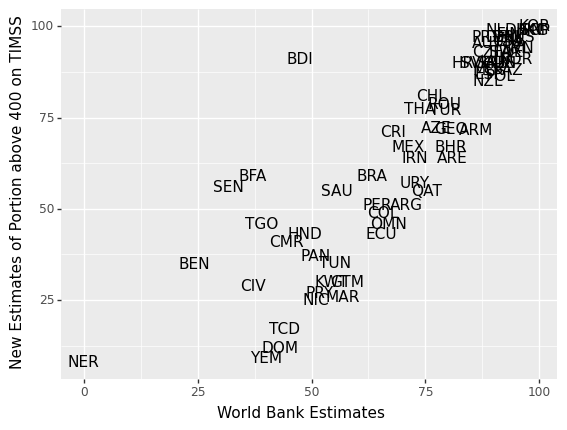

<ggplot: (108046197372)>

In [38]:
ggplot(data= cor1) + geom_text(aes(x=cor1.iloc[:, 2], y=cor1.iloc[:, 1], label=cor1.iloc[:, 0]))

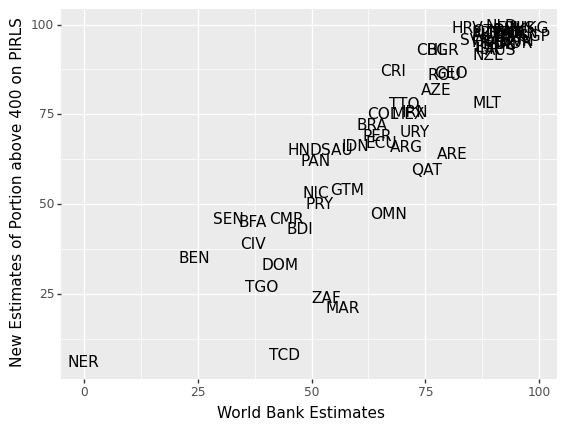

<ggplot: (108046222764)>

In [39]:
ggplot(data= cor2) + geom_text(aes(x=cor2.iloc[:, 2], y=cor2.iloc[:, 1], label=cor2.iloc[:, 0]))

<b> Conclusions </b>
> From the above plots we can infer that the Spearman Correlation values are being confirmed and the relationship between those 3 values are really high (TIMMS-previous estimates & PIRLS-previous estimates). This is because most of the countries follow a pattern and especially we can assume that all of them are placed near a hypothetical line with the majority of them to be gathered near the point 100-100. 
>
>As the authors have written, there are a lot of differencies between the old and new estimates (Section 4.1, paragraph 4) because different approaches were followed. Apart from them, we can conclude that the rankings are pretty similar both on TIMSS and on PIRLS. 

### Q4: Skills Intensity

You will study the relationship between the skills of the people in each country and the value of its exports, as described in Section 4.2 of the original paper. You will do this with performing four regressions:

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In the above:

* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

* $\mathrm{TIMMS}_c$ is the TIMMS score for country $c$, which we divide by 1000 to get a more readable result

* $\mathrm{PIRLS}_c$ is the PIRLS score for country $c$, which we similarly divide by 1000

* $\mathrm{college}_i$ is the portion of employees in industry $i$ with at least a college degree 

* $\mathrm{highschool}$ is the portion of employees in industry $i$ with at least a high school degree 

Report the $R^2$ and the intercept for the interaction terms in each of the models. Note that your values may be different from that of Table 2 of the paper, because the authors perform a lot of data manipulation that you may not do, and they also use a statistical model that is different from the ones we have seen in `statsmodels`. However, the $R^2$ values should be comparable.

* Read the datasets from the given files. As comment next to each one of them has been put the paragraph from the website which were obtained. (__[Link](https://www.ddorn.net/data.htm)__)

In [40]:
ind =  pd.read_stata('cw_ind2000_ind1990ddx.dta') #[C] Industry Codes
hs =  pd.read_stata('cw_hs6_sic87dd.dta') #[D] Industry Trade Exposure
sic =  pd.read_stata('cw_sic87_ind1990ddx.dta') #[C] Industry Codes

* Next there will be done the appropriate modifications, following the given instructions, in order to create the dataset where the regression models will be applied.

In [41]:
census = census[census['EDUC'] >= 6]
census['PERWT'] = census['PERWT'].astype('float64')
census['EDUC'] = census['EDUC'].astype('int64')

print(census.shape)
census.sort_values(by='EDUC', ascending=True).head()

(242038, 15)


,YEAR,SAMPLE,SERIAL,HHWT,CLUSTER,STRATA,GQ,PERNUM,PERWT,EDUC,EDUCD,EMPSTAT,EMPSTATD,OCC2010,IND
185556,2000,200004,78703,1800.0,2000000787034,29,1,2,1810.0,6,65,3,30,4950,569
201987,2000,200004,85619,600.0,2000000856194,37,1,2,622.0,6,62,1,10,4760,538
201990,2000,200004,85621,600.0,2000000856214,13,1,1,574.0,6,62,1,10,8630,229
201991,2000,200004,85621,600.0,2000000856214,13,1,2,574.0,6,62,1,10,130,718
201993,2000,200004,85622,600.0,2000000856224,6,1,2,615.0,6,62,3,30,9920,0


* Count the education attainments by industry codes (it will be used for calculating the average) - __[Variables Description of Census Dataframe](https://usa.ipums.org/usa-action/variables/live_search)__

In [42]:
size = census.groupby(['IND', 'EDUC'], as_index=False).size()
size = size.pivot_table(index='IND', columns='EDUC', values='size').sort_index()
size.head()

EDUC,6,7,8,10,11
IND,,,,,
0,25875.0,6001.0,1767.0,5167.0,2599.0
17,786.0,238.0,106.0,188.0,56.0
18,534.0,117.0,57.0,99.0,25.0
19,15.0,10.0,5.0,14.0,7.0
27,120.0,14.0,6.0,7.0,3.0


* We will inverse the first dataset (census) and sum the `PERWT` variable in order to have these values by industry and by educational attainment.

In [43]:
c = census.pivot_table(index='IND', columns='EDUC', values='PERWT', aggfunc='sum').sort_index()
c.head()

EDUC,6,7,8,10,11
IND,,,,,
0,17917662.0,4063575.0,1215786.0,3427512.0,1690020.0
17,475121.0,133696.0,64698.0,102654.0,30735.0
18,345703.0,64000.0,35896.0,57218.0,13717.0
19,11900.0,4912.0,2738.0,6958.0,3137.0
27,92115.0,9883.0,3067.0,4271.0,3646.0


* The columns `No_x` refer to the previous sum and the columns `No_y` refer to the count found earlier.

In [44]:
c = pd.merge(c, size, left_index=True, right_index=True)
c.head()

EDUC,6_x,7_x,8_x,10_x,11_x,6_y,7_y,8_y,10_y,11_y
IND,,,,,,,,,,
0,17917662.0,4063575.0,1215786.0,3427512.0,1690020.0,25875.0,6001.0,1767.0,5167.0,2599.0
17,475121.0,133696.0,64698.0,102654.0,30735.0,786.0,238.0,106.0,188.0,56.0
18,345703.0,64000.0,35896.0,57218.0,13717.0,534.0,117.0,57.0,99.0,25.0
19,11900.0,4912.0,2738.0,6958.0,3137.0,15.0,10.0,5.0,14.0,7.0
27,92115.0,9883.0,3067.0,4271.0,3646.0,120.0,14.0,6.0,7.0,3.0


* Calculate the weighted means.

In [45]:
c['college'] = (6*c['6_x']/c['6_y'] + 7*c['7_x']/c['7_y'] + 8*c['8_x']/c['8_y'])/(6+7+8)
c['high_school'] = (10*c['10_x']/c['10_y'] + 11*c['11_x']/c['11_y'])/(10+11)
c = c.reset_index()
c.head()

EDUC,IND,6_x,7_x,8_x,10_x,11_x,6_y,7_y,8_y,10_y,11_y,college,high_school
0,0,17917662.0,4063575.0,1215786.0,3427512.0,1690020.0,25875.0,6001.0,1767.0,5167.0,2599.0,685.679768,656.490568
1,17,475121.0,133696.0,64698.0,102654.0,30735.0,786.0,238.0,106.0,188.0,56.0,592.475290,547.502442
2,18,345703.0,64000.0,35896.0,57218.0,13717.0,534.0,117.0,57.0,99.0,25.0,607.209442,562.622665
3,19,11900.0,4912.0,2738.0,6958.0,3137.0,15.0,10.0,5.0,14.0,7.0,599.009524,471.408163
4,27,92115.0,9883.0,3067.0,4271.0,3646.0,120.0,14.0,6.0,7.0,3.0,649.361111,927.147392


* Create the `skills_intensity_industry` dataframe.

In [46]:
skills_intensity_industry = c[['IND', 'college', 'high_school']]
skills_intensity_industry.head()

EDUC,IND,college,high_school
0,0,685.679768,656.490568
1,17,592.475290,547.502442
2,18,607.209442,562.622665
3,19,599.009524,471.408163
4,27,649.361111,927.147392


* Next, we are going to work with the `industry codes` and it will be done by reweighted the averages of 1990 and 2000. We can observe that the sum of the weights for one code in 2000 is always 1. So, we just split the average and at the end the whole amount for the specific code will be kept. 

In [47]:
ind = ind.rename(columns={'ind2000': 'IND'})
print(ind.shape)
ind.sort_values(by='IND', ascending=True).head()

(712, 3)


,IND,ind1990ddx,weight
0,17,10,0.994016
1,17,31,0.002637
2,17,121,0.001740
3,17,561,0.001607
4,18,11,0.990907


In [48]:
#sii is a temporary dataframe
sii = pd.merge(ind, skills_intensity_industry, on='IND', how='left')
sii.head()

,IND,ind1990ddx,weight,college,high_school
0,17,10,0.994016,592.475290,547.502442
1,17,31,0.002637,592.475290,547.502442
2,17,121,0.001740,592.475290,547.502442
3,17,561,0.001607,592.475290,547.502442
4,18,11,0.990907,607.209442,562.622665


In [49]:
sii['college'] = sii['weight']*sii['college']
sii['high_school'] = sii['weight']*sii['high_school']
sii.head()

,IND,ind1990ddx,weight,college,high_school
0,17,10,0.994016,588.929745,544.226029
1,17,31,0.002637,1.562240,1.443656
2,17,121,0.001740,1.031133,0.952863
3,17,561,0.001607,0.952171,0.879895
4,18,11,0.990907,601.687890,557.506555


* For later computations we will only need the industry codes from the year 1990 so we get rid of the codes for the 2000. So, we find the average of these values.

In [50]:
skills_intensity_industry = sii[['ind1990ddx', 'college', 'high_school']]
skills_intensity_industry['ind1990ddx'] = skills_intensity_industry['ind1990ddx'].astype('int64')
skills_intensity_industry = skills_intensity_industry.groupby(['ind1990ddx']).agg({'college':'mean','high_school':'mean'})

print(skills_intensity_industry.shape)
skills_intensity_industry.head()

(222, 2)


,college,high_school
ind1990ddx,,
10,415.173135,374.808726
11,601.687890,557.506555
20,309.563482,277.053656
31,246.043229,196.627606
32,236.682144,274.932112


* Now, we will edit the `BACI_HS17_Y2018_V202001.csv.gz` file, which contains records showing the exports of different countries in 2018 for different industry sectors.

In [51]:
baci.columns = ['year', 'exporter', 'importer', 'hs6', 'trade_flow', 'quantity']
baci = baci.sort_values(by='hs6')
baci['hs6'] = baci['hs6'].astype('int64')
baci['trade_flow'] = baci['trade_flow'].astype('float64')
print(baci.shape)
baci.head()

(7738903, 6)


,year,exporter,importer,hs6,trade_flow,quantity
4979742,2018,616,784,10121,190.002000,4.500
4766506,2018,591,604,10121,77.278000,9.001
3485093,2018,392,381,10121,110.484479,0.500
2449631,2018,276,586,10121,14.558000,2.862
2508354,2018,276,711,10121,518.956000,7.155


* `hs` is a dataframe that refers to the `cw_hs6_sic87dd.dta` file and consists of the HS 6-digit codes and Standard Industrial Codes (SIC87) industry codes with their weighted methods.

In [52]:
print(hs.shape)
hs.sort_values(by='sic87dd', ascending=True)

(6752, 4)


,hs6,sic87dd,share,weights_method
460,100110.0,111.0,1.000000,no weights needed
461,100190.0,111.0,1.000000,no weights needed
468,100610.0,112.0,1.000000,no weights needed
465,100510.0,115.0,1.000000,no weights needed
466,100590.0,115.0,0.978214,trade-based
...,...,...,...,...
6747,640419.0,NaN,0.084449,trade-based allocated 314X imports
6748,640420.0,NaN,0.012955,trade-based allocated 314X imports
6749,640510.0,NaN,0.121528,trade-based allocated 314X imports
6750,640520.0,NaN,0.192258,trade-based allocated 314X imports


In [53]:
hs = hs[hs['sic87dd'].notna()]
hs['sic87dd'] = hs['sic87dd'].astype('int64')
hs['hs6'] = hs['hs6'].astype('int64')

hs = hs.rename(columns={'sic87dd': 'sic87'})
print(hs.shape)
hs.head()

(6700, 4)


,hs6,sic87,share,weights_method
0,10110,272,1.0,no weights needed
1,10111,272,1.0,no weights needed
2,10119,272,1.0,no weights needed
3,10120,272,1.0,no weights needed
4,10190,272,1.0,no weights needed


* Here we create a dataframe which contains the join of `baci` and `hs` in order to  adjust the value of the `trade_flow` of the `baci` file with the `share` column.

In [54]:
baci = pd.merge(baci, hs, on = 'hs6', how='left')
baci = baci.sort_values(by='weights_method')
baci = baci[baci['sic87'].notna()]
baci['sic87'] = baci['sic87'].astype('int64')
print(baci.shape)
baci.head()

(9473512, 9)


,year,exporter,importer,hs6,trade_flow,quantity,sic87,share,weights_method
1854,2018,703,208,10190,3.857000,2.976522,272,1.0,no weights needed
5807032,2018,528,792,741510,4.431986,0.054136,3399,1.0,no weights needed
5807031,2018,36,724,741510,1.039741,0.053000,3399,1.0,no weights needed
5807030,2018,410,724,741510,42.097161,1.915000,3399,1.0,no weights needed
5807029,2018,528,58,741510,738.296571,81.321518,3399,1.0,no weights needed


* Some of the weighted methods are null.

In [55]:
baci.groupby(['weights_method']).size()

weights_method
no weights needed                     5532386
trade-based                           3941126
based on number of products                 0
trade-based allocated 314X imports          0
dtype: int64

* The wanted dataframe after the adjustment.

In [56]:
baci['trade_flow'] = baci['trade_flow']*baci['share']
baci.head()

,year,exporter,importer,hs6,trade_flow,quantity,sic87,share,weights_method
1854,2018,703,208,10190,3.857000,2.976522,272,1.0,no weights needed
5807032,2018,528,792,741510,4.431986,0.054136,3399,1.0,no weights needed
5807031,2018,36,724,741510,1.039741,0.053000,3399,1.0,no weights needed
5807030,2018,410,724,741510,42.097161,1.915000,3399,1.0,no weights needed
5807029,2018,528,58,741510,738.296571,81.321518,3399,1.0,no weights needed


In [57]:
#b is a temporary dataframe
b = baci.groupby(['exporter', 'sic87'])['trade_flow'].sum().to_frame()
b = b.reset_index()
b.head()

,exporter,sic87,trade_flow
0,4,119,68290.428330
1,4,131,39698.892614
2,4,132,43.993665
3,4,134,380.462682
4,4,139,13308.065785


* Now, we join the temporary dataframe of the `baci` with the dataframe from the `cw_sic87_ind1990ddx.dta` file, to map the SIC87 industry codes to the 1990 census industry codes.

In [58]:
ind_codes = pd.merge(b, sic, on='sic87', how='left')
ind_codes = ind_codes[ind_codes['ind1990ddx'].notna()]
ind_codes['ind1990ddx'] = ind_codes['ind1990ddx'].astype('int64')
print(ind_codes.shape)
ind_codes.head()

(67052, 4)


,exporter,sic87,trade_flow,ind1990ddx
0,4,119,68290.428330,10
1,4,131,39698.892614,10
2,4,132,43.993665,10
3,4,134,380.462682,10
4,4,139,13308.065785,10


* After that, we are going to use the `country_codes_V202001.csv` file, which contains details for all the countries, Then, we will merge it with the above `ind_codes` dataframe to create the `exports` dataframe.

In [59]:
ind_codes = ind_codes.rename(columns={'exporter': 'country_code'})
exports = pd.merge(ind_codes, country_codes[['country_code', 'iso_3digit_alpha']], on='country_code', how='left')
print(exports.shape)
exports.head()

(67052, 5)


,country_code,sic87,trade_flow,ind1990ddx,iso_3digit_alpha
0,4,119,68290.428330,10,AFG
1,4,131,39698.892614,10,AFG
2,4,132,43.993665,10,AFG
3,4,134,380.462682,10,AFG
4,4,139,13308.065785,10,AFG


* We drop the non-wanted `country_code` column.

In [60]:
exports = exports[['sic87', 'trade_flow', 'ind1990ddx', 'iso_3digit_alpha']]
exports['ind1990ddx'] = exports['ind1990ddx'].astype('int64')
print(exports.shape)
exports.head()

(67052, 4)


,sic87,trade_flow,ind1990ddx,iso_3digit_alpha
0,119,68290.428330,10,AFG
1,131,39698.892614,10,AFG
2,132,43.993665,10,AFG
3,134,380.462682,10,AFG
4,139,13308.065785,10,AFG


In [61]:
exports = pd.merge(exports, skills_intensity_industry, on = 'ind1990ddx', how = 'left')
exports = exports.rename(columns={'iso_3digit_alpha': 'Country Code'})
print(exports.shape)
exports.head()

(67052, 6)


,sic87,trade_flow,ind1990ddx,Country Code,college,high_school
0,119,68290.428330,10,AFG,415.173135,374.808726
1,131,39698.892614,10,AFG,415.173135,374.808726
2,132,43.993665,10,AFG,415.173135,374.808726
3,134,380.462682,10,AFG,415.173135,374.808726
4,139,13308.065785,10,AFG,415.173135,374.808726


* We joined the `exports` dataframe with the `skills_intensity_industry` and then we dropped the code from 1990, because it was needed no more.

In [62]:
exports = exports[['sic87', 'trade_flow', 'Country Code', 'college', 'high_school']]
exports.sort_values(by='sic87').head()

,sic87,trade_flow,Country Code,college,high_school
63576,112,1792.408056,GBR,415.173135,374.808726
55556,112,248.459749,ZAF,415.173135,374.808726
11509,112,52.209515,LKA,415.173135,374.808726
25123,112,12.058667,HND,415.173135,374.808726
60164,112,983.909632,ARE,415.173135,374.808726


In [63]:
exports = exports.groupby(['sic87', 'Country Code', 'college', 'high_school'], as_index=False)['trade_flow'].sum()
print(exports.shape)
exports.sort_values(by='Country Code').head()

(65977, 5)


,sic87,Country Code,college,high_school,trade_flow
4934,1321,ABW,328.620516,346.782123,16399.458212
60893,3823,ABW,132.695284,132.346301,11.901750
28817,2873,ABW,603.955890,506.148918,2.423152
31126,3069,ABW,141.343083,125.902437,1.858790
41532,3452,ABW,113.091657,102.413641,1.754718


* We create the final dataframe (`df`) which contains all the above records and they will be used for the regression later on.

In [64]:
df = pd.merge(exports, country_scores, on = 'Country Code', how = 'inner')
print(df.shape)
df

(30035, 10)


,sic87,Country Code,college,high_school,trade_flow,Country,Percent Above Math Benchmark (400 on TIMSS Scale),Percent Above Reading Benchmark (400 on PIRLS Scale),"Median Math Score (TIMSS Scale, 4th Grade)","Median Reading Score (PIRLS Scale, 4th Grade)"
0,112,ARE,415.173135,374.808726,983.909632,U.A.E.,64.0,63.982311,437.000000,440.000000
1,115,ARE,415.173135,374.808726,25190.509539,U.A.E.,64.0,63.982311,437.000000,440.000000
2,119,ARE,415.173135,374.808726,250766.719218,U.A.E.,64.0,63.982311,437.000000,440.000000
3,131,ARE,415.173135,374.808726,6151.294980,U.A.E.,64.0,63.982311,437.000000,440.000000
4,132,ARE,415.173135,374.808726,13392.163626,U.A.E.,64.0,63.982311,437.000000,440.000000
...,...,...,...,...,...,...,...,...,...,...
30030,3915,BDI,73.276758,77.940361,0.006228,Burundi,91.0,43.000000,476.978455,392.374207
30031,3944,BDI,73.276758,77.940361,1.346000,Burundi,91.0,43.000000,476.978455,392.374207
30032,3949,BDI,73.276758,77.940361,11.461000,Burundi,91.0,43.000000,476.978455,392.374207
30033,3991,BDI,73.276758,77.940361,1.358647,Burundi,91.0,43.000000,476.978455,392.374207


### Regression Analysis

* We will edit the `df` dataframe and its columns in order to use them for regression analysis.

In [65]:
df = df.drop(['Percent Above Math Benchmark (400 on TIMSS Scale)', 'Percent Above Reading Benchmark (400 on PIRLS Scale)'], axis=1)
df = df.rename(columns={'Country Code': 'country_code', 'Country': 'country', 'sic87': 'sic', 
                        'Median Math Score (TIMSS Scale, 4th Grade)': 'TIMSS',
                        'Median Reading Score (PIRLS Scale, 4th Grade)': 'PIRLS'})
df.iloc[:, 6] = df.iloc[:, 6]/1000 #TIMSS/1000
df.iloc[:, 7] = df.iloc[:, 7]/1000 #PIRLS/1000
df.iloc[:, 4] = np.log(df.iloc[:, 4]) #LOG(trade_flow)
df.head()

,sic,country_code,college,high_school,trade_flow,country,TIMSS,PIRLS
0,112,ARE,415.173135,374.808726,6.891534,U.A.E.,0.437,0.44
1,115,ARE,415.173135,374.808726,10.134223,U.A.E.,0.437,0.44
2,119,ARE,415.173135,374.808726,12.432278,U.A.E.,0.437,0.44
3,131,ARE,415.173135,374.808726,8.724418,U.A.E.,0.437,0.44
4,132,ARE,415.173135,374.808726,9.502425,U.A.E.,0.437,0.44


* Keep the columns we want to.

In [66]:
df = df[['country', 'country_code', 'sic', 'college', 'high_school', 'trade_flow', 'TIMSS', 'PIRLS']]
df.head()

,country,country_code,sic,college,high_school,trade_flow,TIMSS,PIRLS
0,U.A.E.,ARE,112,415.173135,374.808726,6.891534,0.437,0.44
1,U.A.E.,ARE,115,415.173135,374.808726,10.134223,0.437,0.44
2,U.A.E.,ARE,119,415.173135,374.808726,12.432278,0.437,0.44
3,U.A.E.,ARE,131,415.173135,374.808726,8.724418,0.437,0.44
4,U.A.E.,ARE,132,415.173135,374.808726,9.502425,0.437,0.44


* We apply the four below regressions (`df_res1`, `df_res2`, `df_res3`, `df_res4` accordingly): 

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{college}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{TIMSS}_{c}/1000:\mathrm{highschool}_i + i + c $$

$$ \log(V_{ci}) \sim \mathrm{PIRLS}_{c}/1000:\mathrm{highschool}_i + i + c $$

In the above:

* $V_{ci}$ is the value of export trade for each country ($c$) and industry ($i$)

In [72]:
mod1 = smf.ols("trade_flow ~ TIMSS:college", data=df)
df_res1 = mod1.fit()
df_res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             trade_flow   R-squared:                       0.010
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     278.1
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           4.05e-62
Time:                        17:14:22   Log-Likelihood:                -74925.
No. Observations:               27187   AIC:                         1.499e+05
Df Residuals:                   27185   BIC:                         1.499e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.7942      0.043    183.282      0.000       7.711       7.878
TIMSS:college     0.0047      0.000     16.675      0.000       0.004       0.005
==============================================================================
Omnibus:                      947.388   Durbin-Watson:                   0.760
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1049.900
Skew:                          -0.481   Prob(JB):                    1.04e-228
Kurtosis:                       3.009   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
mod2 = smf.ols("trade_flow ~ PIRLS:college", data=df)
df_res2 = mod2.fit()
df_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             trade_flow   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     207.6
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           6.78e-47
Time:                        17:14:35   Log-Likelihood:                -71985.
No. Observations:               26109   AIC:                         1.440e+05
Df Residuals:                   26107   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         7.9522      0.044    181.599      0.000       7.866       8.038
PIRLS:college     0.0040      0.000     14.410      0.000       0.003       0.005
==============================================================================
Omnibus:                     1084.732   Durbin-Watson:                   0.749
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1225.348
Skew:                          -0.530   Prob(JB):                    8.30e-267
Kurtosis:                       3.047   Cond. No.                         294.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
mod3 = smf.ols("trade_flow ~ TIMSS:high_school", data=df)
df_res3 = mod3.fit()
df_res3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             trade_flow   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     220.8
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           9.61e-50
Time:                        17:14:49   Log-Likelihood:                -74954.
No. Observations:               27187   AIC:                         1.499e+05
Df Residuals:                   27185   BIC:                         1.499e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             7.8941      0.041    194.527      0.000       7.815       7.974
TIMSS:high_school     0.0041      0.000     14.858      0.000       0.004       0.005
==============================================================================
Omnibus:                      945.605   Durbin-Watson:                   0.754
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1047.710
Skew:                          -0.481   Prob(JB):                    3.11e-228
Kurtosis:                       3.011   Cond. No.                         260.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
mod4 = smf.ols("trade_flow ~ PIRLS:high_school", data=df)
df_res4 = mod4.fit()
df_res4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             trade_flow   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     158.4
Date:                Wed, 31 Mar 2021   Prob (F-statistic):           3.28e-36
Time:                        17:14:56   Log-Likelihood:                -72009.
No. Observations:               26109   AIC:                         1.440e+05
Df Residuals:                   26107   BIC:                         1.440e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             8.0505      0.042    192.828      0.000       7.969       8.132
PIRLS:high_school     0.0034      0.000     12.584      0.000       0.003       0.004
==============================================================================
Omnibus:                     1084.299   Durbin-Watson:                   0.744
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1224.742
Skew:                          -0.530   Prob(JB):                    1.12e-266
Kurtosis:                       3.050   Cond. No.                         273.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
print('Model 1, Intercept:', round(df_res1.params[0], 3), '/ R_Squared:', round(df_res1.rsquared,3))
print('Model 2, Intercept:', round(df_res2.params[0], 3), '/ R_Squared:', round(df_res2.rsquared,3))
print('Model 3, Intercept:', round(df_res3.params[0], 3), '/ R_Squared:', round(df_res3.rsquared,3))
print('Model 4, Intercept:', round(df_res4.params[0], 3), '/ R_Squared:', round(df_res4.rsquared,3))

Model 1, Intercept: 7.794 / R_Squared: 0.01
Model 2, Intercept: 7.952 / R_Squared: 0.008
Model 3, Intercept: 7.894 / R_Squared: 0.008
Model 4, Intercept: 8.051 / R_Squared: 0.006


<b> Conclusions </b>
> After executing the above models we can infer that the value of the export trade for each country and industry for college graduates does not differ a lot with this of high school graduates. To be more speciific, the values of both Intercept and $R^2$ in the converted TIMSS scale are nearly the same between `Model 1` and `Model 3`. The same stands for the converted PIRLS scale too.
>
> It is worth to explain that the Intercept in the case of `Model 1`, means that if in one country and in one industry the TIMSS score is 0 and there are no college graduates, then the logarithmic value of the exports will be equal to `7.794`, or if we do the calculations it will be equal to 2426 nearly. [e^(7.794) = 2426.002] In the other models will be equal to 2841.25 for `Model 2`, 2681.15 for `Model 3` and 3136.93 for `Model 4`.
>
>Also, the $R^2$ for all the models is very small and aproximately 1%. This means that the models are not good and do not 
improove the situation  from the null/full model. Practically, it means that nearly 1% of the proportion of the `log_trade_flow` variance is explained by its interaction terms. Nevertheless, the fact that all the models have nearly the same $R^2$ is very interesting, because we can assume that all the models fit the same way in the whole dataset. 
> 
>Finally, we can conclude that having higher reading test scores is associated with relatively more exports and this is because of the higher Intercept in the models of PIRLS than those of TIMSS. This is very contrary with what the authors of the article propose. The authors have found better models with more accurate results. This is because many more manipulations had been executed and probably they have taken into consideration a variety of other factors. So, much more investigation should be done in order to have more accurate results.